Rows: 38982 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): country, region, sub_region, income_group
dbl (10): year, population, life_expectancy, income, children_per_woman, chi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


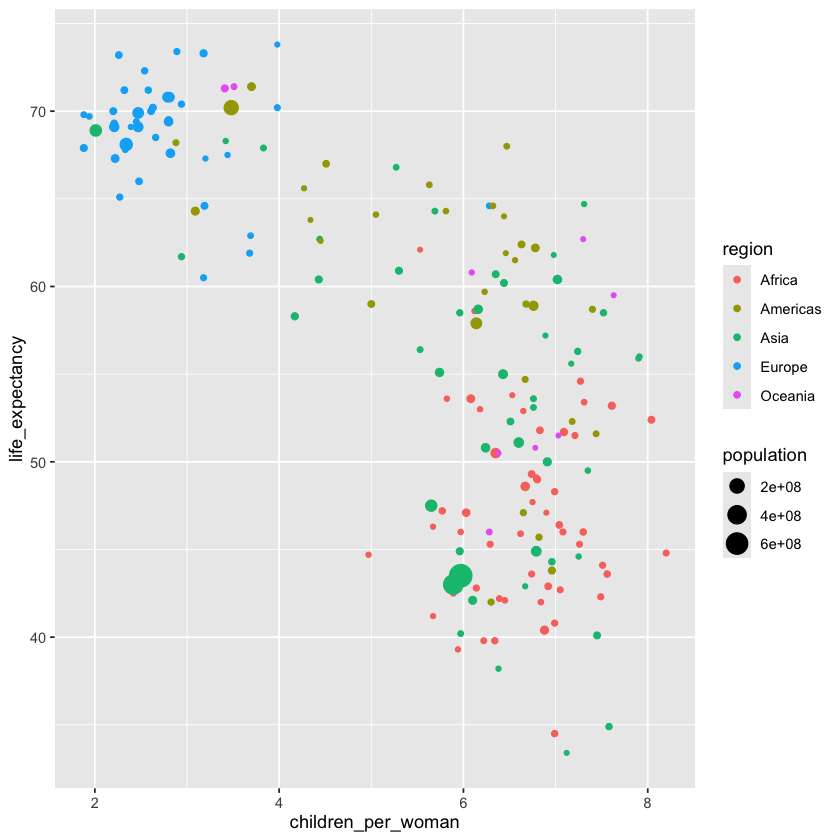

In [14]:
library(ggplot2)
library(readr)

#Q2.2
gm_data <- read_csv("https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv")

gm_data_1962 <- gm_data[gm_data$year == 1962, ]

p <- ggplot(
    gm_data_1962,
    aes(
      x = children_per_woman,
      y = life_expectancy,
      color = region,
      size = population)) + geom_point()
      
print(p)

$x
[1] "Year"

$y
[1] "Mean Ratio (Women / Men)"

$colour
[1] "Income Group"

$title
[1] "Ratio of Women's to Men's Years in School Over Time"

attr(,"class")
[1] "labels"

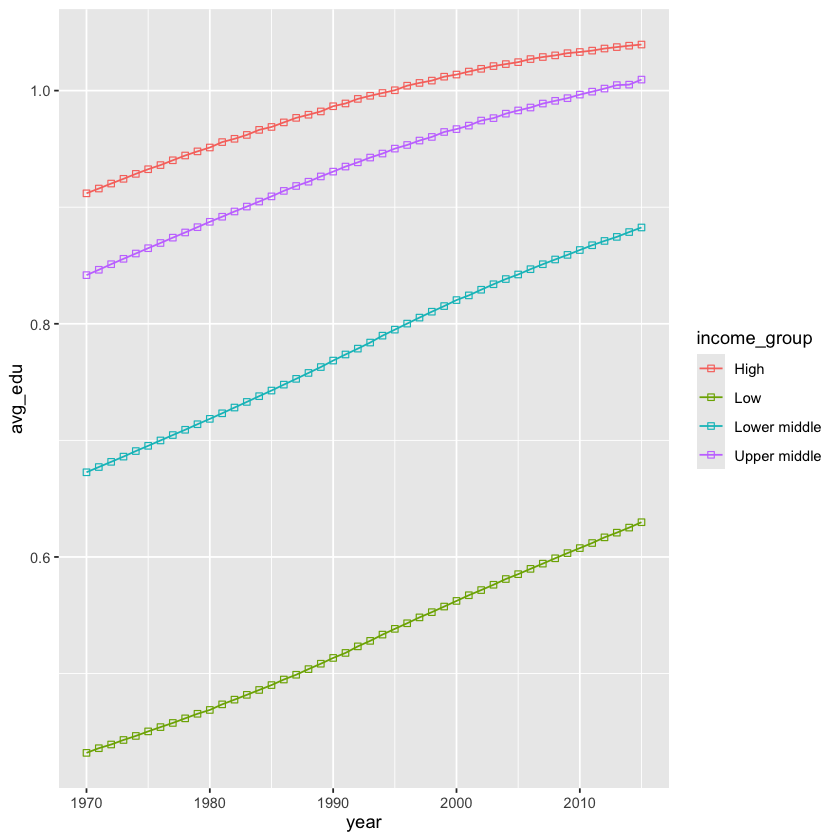

In [15]:
#Q3.2
gm_data$years_edu <- gm_data$years_in_school_women / gm_data$years_in_school_men
gm_filtered <- gm_data[gm_data$year >= 1970 & gm_data$year <= 2015, ]

gm_group <- aggregate(
  years_edu ~ income_group + year,
  data = gm_filtered,
  FUN = mean
)
colnames(gm_group)[3] <- "avg_edu"

p2 <- ggplot(
    gm_group,
    aes(x = year, y = avg_edu, color = income_group)) +
    geom_line() +
    geom_point(shape=0)
    labs(
        title = "Ratio of Women's to Men's Years in School Over Time",
        x = "Year",
        y = "Mean Ratio (Women / Men)",
        color = "Income Group")

print(p2)

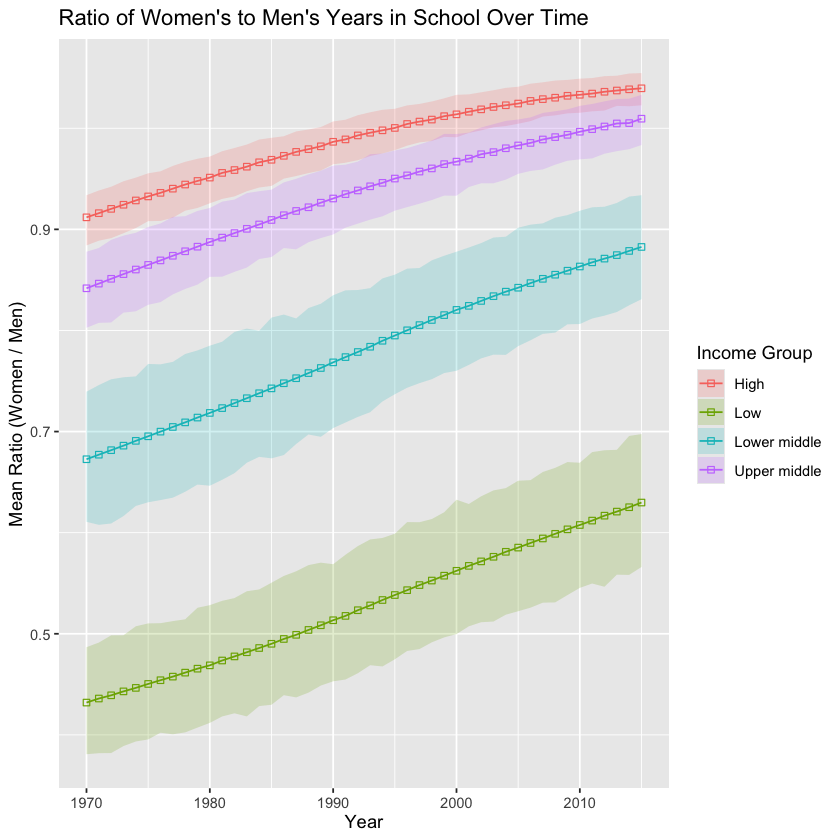

In [16]:
#Q3.4
p3 <- ggplot(
  gm_filtered,
  aes(
    x = year,
    y = years_edu,
    color = income_group,
    fill = income_group,
    group = income_group
  )
) +
  geom_ribbon(
    stat = "summary",
    fun.data = mean_cl_boot,
    alpha = 0.2,
    color = NA
  ) +
  geom_line(stat = "summary", fun = mean) +
  geom_point(stat = "summary", fun = mean, shape = 0) +
  labs(
    title = "Ratio of Women's to Men's Years in School Over Time",
    x = "Year",
    y = "Mean Ratio (Women / Men)",
    color = "Income Group",
    fill  = "Income Group"
  )
print(p3)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


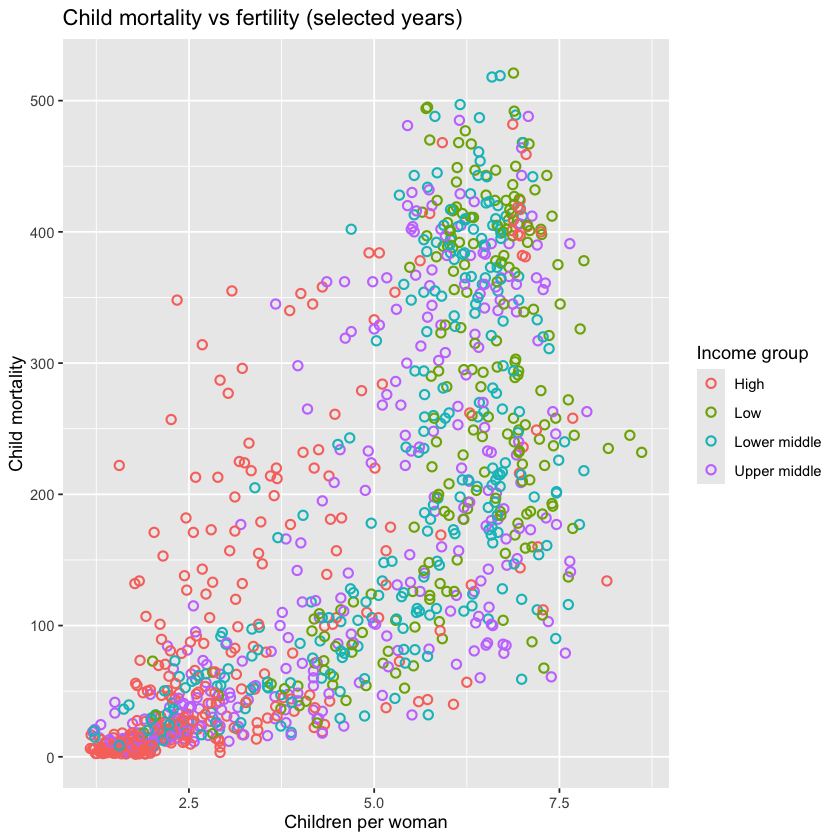

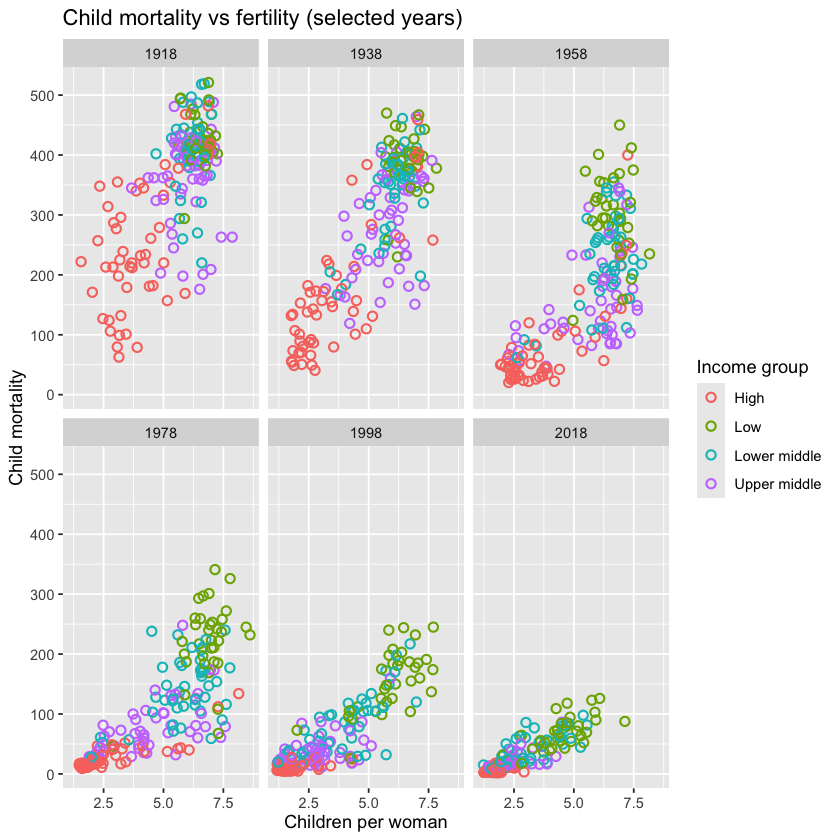

In [17]:
#Q4.2
years_keep <- c(1918, 1938, 1958, 1978, 1998, 2018)

gm_6yrs <- gm_data[gm_data$year %in% years_keep, ]

p4 <- ggplot(
  gm_6yrs,
  aes(x = children_per_woman, y = child_mortality, color = income_group)
) +
  geom_point(shape = 1, size = 2, stroke = 0.9) +
  labs(
    x = "Children per woman",
    y = "Child mortality",
    color = "Income group",
    title = "Child mortality vs fertility (selected years)"
  )

print(p4)

layer1 <- facet_wrap(~ year, ncol = 3)
p4 + layer1

# In RStudio or R Markdown document, to adjust the figure we could do this manually by saving a figure to a png, jpg etc. 
# to the exact dimensions we want.

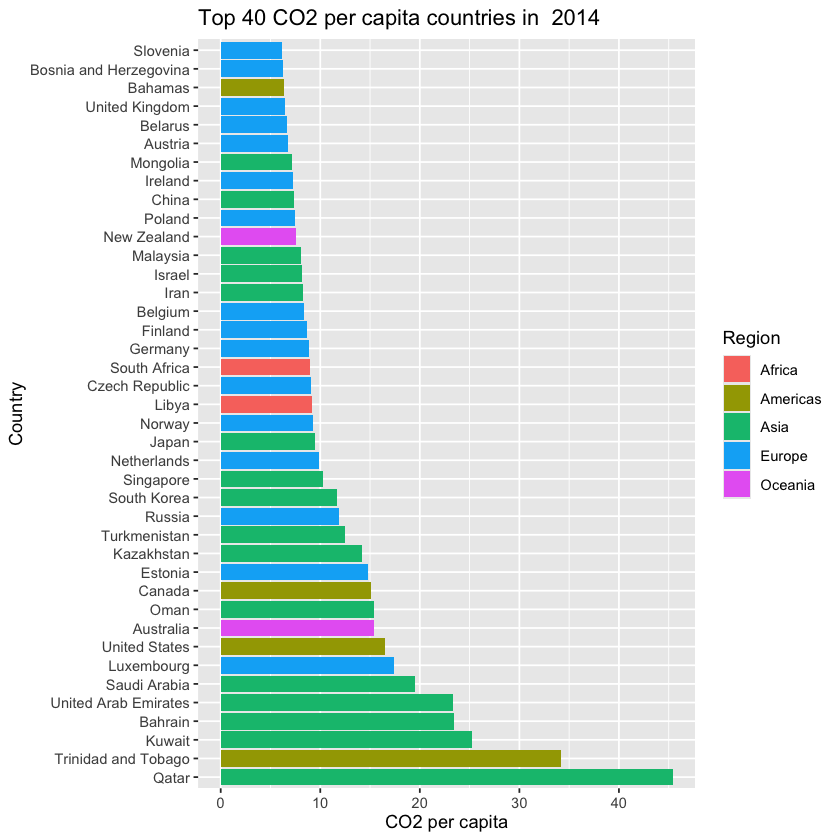

In [18]:
#Q5.2
library(dplyr)
most_recent_year <- max(
  gm_data$year[!is.na(gm_data$co2_per_capita)]
)

gm_recent <- gm_data[gm_data$year == most_recent_year & !is.na(gm_data$co2_per_capita), ]

top40 <- slice_max(
  gm_recent, order_by = co2_per_capita, n = 40, with_ties = FALSE
)

p5 <- ggplot(top40,
       aes(x = co2_per_capita,
           y = reorder(country, -co2_per_capita),
           fill = region)) +
  geom_col(position = "stack") +
  labs(
    title = paste("Top 40 CO2 per capita countries in ", most_recent_year),
    x = "CO2 per capita",
    y = "Country",
    fill = "Region"
  )
print(p5)

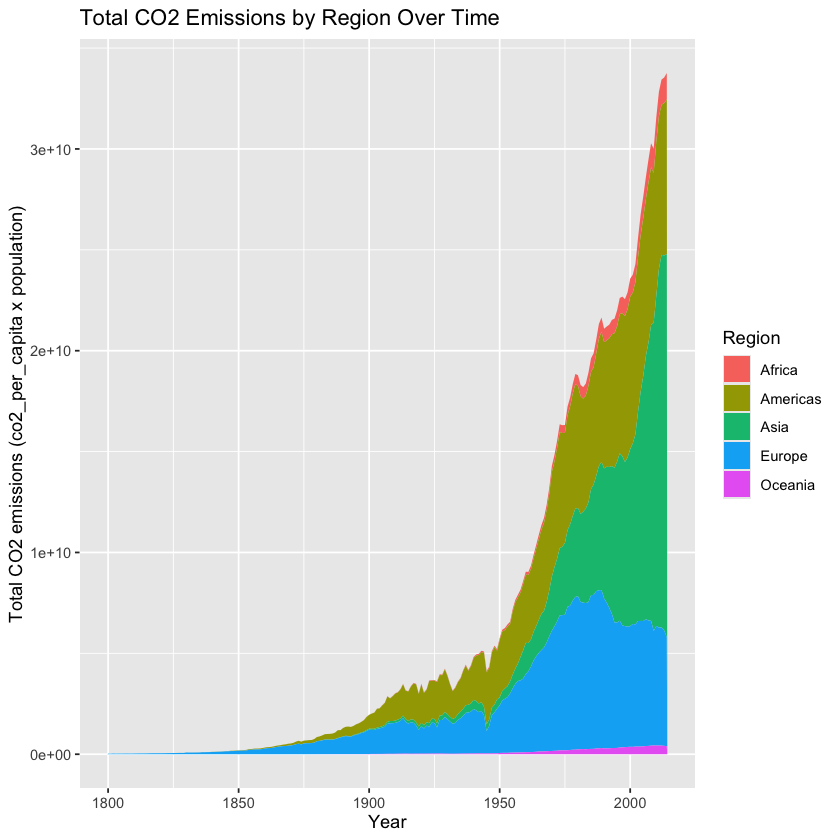

In [19]:
#Q5.4
gm2 <- gm_data
gm2$co2_total <- gm2$co2_per_capita * gm2$population

region_year <- aggregate(
  co2_total ~ region + year,
  data = gm2[!is.na(gm2$co2_total), ],
  FUN = sum,
  na.rm = TRUE
)
names(region_year)[3] <- "co2_total_region"

p6 <- ggplot(region_year, aes(x = year, y = co2_total_region, fill = region)) +
  geom_area(position = "stack") +
  labs(
    title = "Total CO2 Emissions by Region Over Time",
    x = "Year",
    y = "Total CO2 emissions (co2_per_capita x population)",
    fill = "Region"
  )
print(p6)

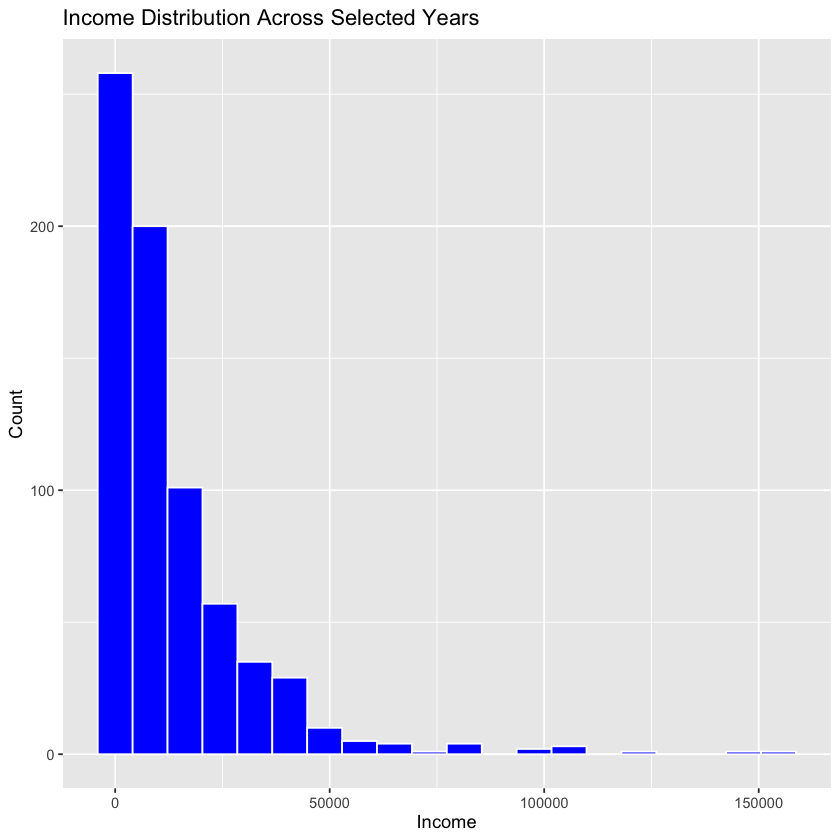

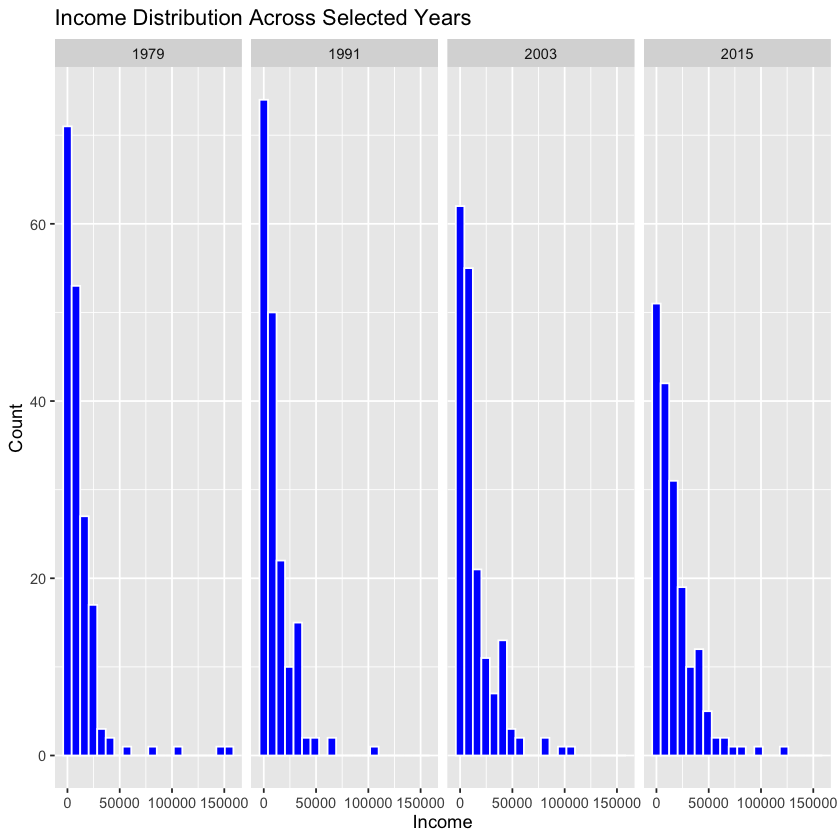

In [20]:
#6.2
years_keep <- c(1979, 1991, 2003, 2015)

gm_hist <- gm_data[gm_data$year %in% years_keep, ]

p7 <- ggplot(gm_hist, aes(x = income)) +
  geom_histogram(bins = 20, fill = "blue", color = "white") +
  labs(
    title = "Income Distribution Across Selected Years",
    x = "Income",
    y = "Count"
  )

print(p7)

p7 + facet_wrap(~ year, nrow = 1)

# The trend appears simmilar over these years. Overall, income data is heavily right skewed.

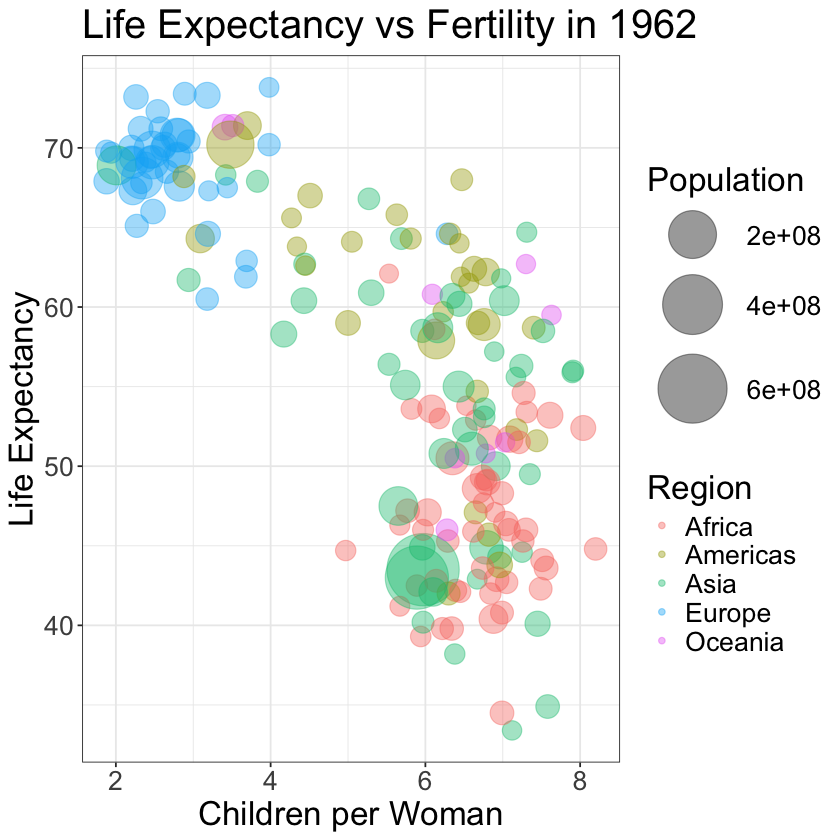

In [21]:
# Q7.2
gm_data_1962 <- gm_data[gm_data$year == 1962, ]

p8 <- ggplot(
  gm_data_1962,
  aes(
    x = children_per_woman,
    y = life_expectancy,
    color = region,
    size = population
  )
) +
  geom_point(alpha = 0.4) +
  labs(
    title = "Life Expectancy vs Fertility in 1962",
    x = "Children per Woman",
    y = "Life Expectancy",
    color = "Region",
    size = "Population"
  ) +
  theme_bw() +
  theme(
    text = element_text(size = 20)
  ) +
  scale_size(range = c(5, 20))

print(p8)